In [1]:
# philip walsh
# philipwalsh.ds@gmail.com
# 2020-02-08
# Team Kermit Image Classification

# train - 2 classes - 4070 images
# ./images/train/no-kermit
# ./images/train/yes-kermit

# test - 2 classes - 50 images
# ./images/test/no-kermit
# ./images/test/yes-kermit


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [3]:
#import winsound
from datetime import datetime
import os
import random

In [4]:
import tensorflow as tf
print ('tensorflow version  :', tf.__version__)

tensorflow version  : 2.0.0


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten

In [6]:
# callbacks
# normally i like early stopping as well as best model
# but for this model i am only using checkpoint to save my best model
# from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.callbacks import ModelCheckpoint

In [7]:
# a saved model is not provided, too large
from tensorflow.keras.models import load_model

In [8]:
from sklearn.metrics import classification_report, confusion_matrix

In [9]:
data_dir_full = 'images/'
os.listdir(data_dir_full)

['readme', 'test', 'train']

In [10]:
data_dir_train = 'images/train/'
os.listdir(data_dir_train)

['no-kermit', 'yes-kermit']

In [11]:
data_dir_test = 'images/test/'
os.listdir(data_dir_test)

['no-kermit', 'yes-kermit']

In [12]:
class_0=os.listdir(data_dir_test)[0]
class_0

'no-kermit'

In [13]:
class_1=os.listdir(data_dir_test)[1]
class_1

'yes-kermit'

In [16]:
os.listdir(data_dir_train + class_0)[0:5]  # have a peek at first 5 non-kermit files

['001.JPG', '001_0.JPG', '001_1.JPG', '001_2.JPG', '001_3.JPG']

In [17]:
os.listdir(data_dir_train + class_1)[0:5]  # have a peek at first 5 kermit files

['_00000000001.JPG',
 '_00000000001_0.JPG',
 '_00000000001_1.JPG',
 '_00000000001_2.JPG',
 '_00000000001_3.JPG']

class_0_len   : 2035
class_0_index : 709
images/train/no-kermit/_067_4.JPG


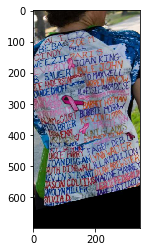

In [18]:
#lets have a look at a random picture from class 0
class_0_len=len(os.listdir(data_dir_train + class_0))
print('class_0_len   :', class_0_len)
class_0_index=random.randint(0, class_0_len-1)
print('class_0_index :', class_0_index)
class_0_random_file = data_dir_train + class_0 + '/' + os.listdir(data_dir_train + class_0)[class_0_index]
print(class_0_random_file)
#imread(class_0_random_file)
plt.imshow(imread(class_0_random_file))

class_1_len   : 2035
class_1_index : 709
images/train/yes-kermit/_00000000050_2.JPG


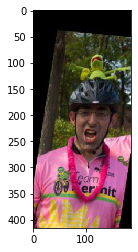

In [19]:
#lets have a look at a random picture from class 0
class_1_len=len(os.listdir(data_dir_train + class_1))
print('class_1_len   :', class_1_len)
class_1_index=random.randint(0, class_1_len-1)
print('class_1_index :', class_0_index)
class_1_random_file = data_dir_train + class_1 + '/' + os.listdir(data_dir_train + class_1)[class_1_index]
print(class_1_random_file)
#imread(class_0_random_file)
plt.imshow(imread(class_1_random_file));

In [20]:
# 
print('data_dir_train :', data_dir_train)
print('data_dir_test  :', data_dir_test)

data_dir_train : images/train/
data_dir_test  : images/test/


In [25]:
# lets loop through all the images and examie dimensions
dim1 = []
dim2 = []
color = []

check_dimensions = True  # you wont neeed to run this more than once
if check_dimensions:
    for image_filename in os.listdir(data_dir_train  + class_0 + '/'):
        img=imread(data_dir_train + class_0 + '/' + image_filename)
        d1, d2, c = img.shape
        dim1.append(d1)
        dim2.append(d2)
        color.append(c)
if check_dimensions:    
    for image_filename in os.listdir(data_dir_train  + class_1 + '/'):
        img=imread(data_dir_train + class_1 + '/' + image_filename)
        d1, d2, c = img.shape
        dim1.append(d1)
        dim2.append(d2)
        color.append(c)
if check_dimensions:    
    for image_filename in os.listdir(data_dir_test  + class_0 + '/'):
        img=imread(data_dir_test + class_0 + '/' + image_filename)
        d1, d2, c = img.shape
        dim1.append(d1)
        dim2.append(d2)
        color.append(c)
if check_dimensions:    
    for image_filename in os.listdir(data_dir_test  + class_1 + '/'):
        img=imread(data_dir_test + class_1 + '/' + image_filename)
        d1, d2, c = img.shape
        dim1.append(d1)
        dim2.append(d2)
        color.append(c)
 

In [26]:
if check_dimensions:
    print('min color :', np.min(color))
    print('max color :', np.max(color))
    print('min dim1  :', np.min(dim1))
    print('max dim1  :', np.max(dim1))
    print('min dim2  :', np.min(dim2))
    print('max dim2  :', np.max(dim2))
    print('mean dim1 :', np.mean(dim1))
    print('mean dim2 :', np.mean(dim2))

min color : 3
max color : 3
min dim1  : 92
max dim1  : 851
min dim2  : 54
max dim2  : 616
mean dim1 : 442.61432038834954
mean dim2 : 249.35364077669902


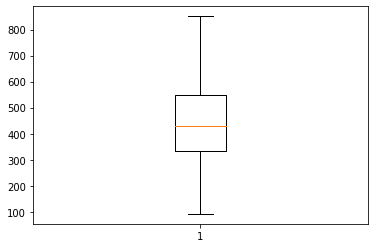

In [27]:
if check_dimensions:
    plt.boxplot(dim1);

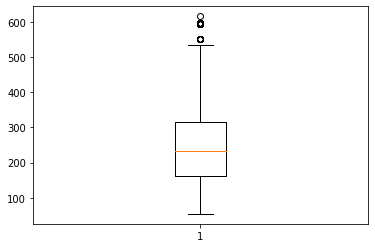

In [28]:
if check_dimensions:
    plt.boxplot(dim2);

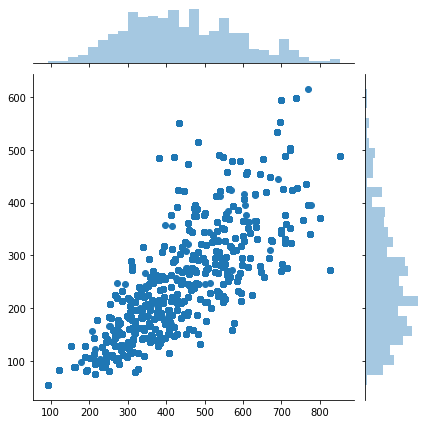

In [29]:
if check_dimensions:
    sns.jointplot(dim1,dim2);

In [30]:
# tf will need a consistent dimension, 
# so lets use numbers close to the mean and color channels 3
image_shape = (440,250,3)

In [31]:
# how many train/test files do we have?
print('X_train files  :', len(os.listdir(data_dir_train + class_0)))
print('y_train files  :', len(os.listdir(data_dir_train + class_1)))
print('X_test files   :', len(os.listdir(data_dir_test + class_0)))
print('y_test files   :', len(os.listdir(data_dir_test + class_1)))


X_train files  : 2035
y_train files  : 2035
X_test files   : 25
y_test files   : 25


In [32]:
# are our images scaled
print('class_0 min intensity : ' , imread(class_0_random_file).min())
print('class_0 max intensity : ' , imread(class_0_random_file).max())
print('class_1 min intensity : ' , imread(class_1_random_file).min())
print('class_1 max intensity : ' , imread(class_1_random_file).max())
# nope

class_0 min intensity :  0
class_0 max intensity :  255
class_1 min intensity :  0
class_1 max intensity :  255


In [33]:
# images are not scaled, we will need to do that
try:
    del image_gen
except:
    print('img gen not defined yet, saul goodman!')
    
# if scaling was needed
#   rescale=1/255 would be the proper parameter
#image_gen= ImageDataGenerator(rescale=1/255,
#                              rotation_range=20,
#                              width_shift_range=0.10,
#                              height_shift_range=0.10,
#                              shear_range=0.1,
#                              zoom_range=0.1,
#                              horizontal_flip=True,
#                              fill_mode='nearest')  #fill modes constant, nearest*, reflect, wrap
image_gen= ImageDataGenerator(rescale=1/255) 

img gen not defined yet, saul goodman!


performing a random trnsform on an image using tensorflow/keras
before


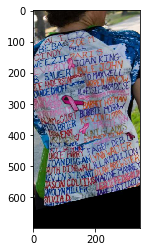

after


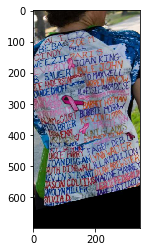

In [34]:
print('performing a random trnsform on an image using tensorflow/keras')
print('before')
plt.imshow(imread(class_0_random_file))
plt.show()
print('after') #in my new image gen, i took out the transform, so this before/after look is not needed
plt.imshow(image_gen.random_transform(imread(class_0_random_file)))

In [35]:
# we will be using flow_from_directory to train our model
image_gen.flow_from_directory(data_dir_train)

Found 4070 images belonging to 2 classes.


In [36]:
image_gen.flow_from_directory(data_dir_test)

Found 50 images belonging to 2 classes.


In [37]:
try:
    del model
except:
    print('no model defined yet, saul goodman')
    
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

no model defined yet, saul goodman


In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 438, 248, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 219, 124, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 217, 122, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 108, 61, 64)       0         
_________________________________________________________________
flatten (Flatten)            (None, 421632)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               53969024  
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

In [39]:
# not using early stopping for this model
#try:
#    del e_stop
#except:
#    print('e_stop is not defined yet, saul goodman')
      
#e_stop = EarlyStopping(monitor='val_loss', patience=2)
#print('e_stop defined')

try:
    del best_mod
except:
    print('best_mod is not defined yet, saul goodman')
    
    
# ** dont forget to create the folder ./model/ **

# i want to save my very best model
best_mod = ModelCheckpoint('model/find_kermit.h5', 
                     monitor='val_loss', 
                     save_best_only=True)
print('best_mod defined')

best_mod is not defined yet, saul goodman
best_mod defined


In [40]:
batch_size=16

In [41]:
try:
    del train_image_gen
except:
    pass

train_image_gen = image_gen.flow_from_directory(data_dir_train,
                                                target_size=image_shape[:2],
                                                color_mode='rgb',
                                                batch_size=batch_size,
                                                class_mode='binary')

Found 4070 images belonging to 2 classes.


In [42]:
try:
    del test_image_gen
except:
    pass

test_image_gen = image_gen.flow_from_directory(data_dir_test, 
                                                target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',
                                              shuffle=False)

Found 50 images belonging to 2 classes.


In [43]:
# sanity check here, make sure my classes in trin/tets folder are the same
train_image_gen.class_indices

{'no-kermit': 0, 'yes-kermit': 1}

In [44]:
test_image_gen.class_indices

{'no-kermit': 0, 'yes-kermit': 1}

In [45]:
my_epochs = 25
# my main machine has 2 GPU(s)
# so here i select which device i want to train the model on
if False:
    with tf.device('/CPU:0'):
        # i7-6700K @ 4.00GHz or i7-7820HQ @ 2.90 GHz
        results = model.fit_generator(train_image_gen, epochs=my_epochs, validation_data=test_image_gen, callbacks=[best_mod]) 
if True:
    with tf.device('/GPU:0'): 
        # RTX 2080
        results = model.fit_generator(train_image_gen, epochs=my_epochs, validation_data=test_image_gen, callbacks=[best_mod])
if False:
    with tf.device('/GPU:1'): 
        # GTX 970
        results = model.fit_generator(train_image_gen, epochs=my_epochs, validation_data=test_image_gen, callbacks=[best_mod])
    



Epoch 1/25
255/255 [==============================] - 38s 151ms/step - loss: 0.6649 - accuracy: 0.7428 - val_loss: 0.4012 - val_accuracy: 0.8200
Epoch 2/25
255/255 [==============================] - 35s 138ms/step - loss: 0.3676 - accuracy: 0.8565 - val_loss: 0.1708 - val_accuracy: 0.9000
Epoch 3/25
255/255 [==============================] - 35s 138ms/step - loss: 0.2353 - accuracy: 0.9155 - val_loss: 0.1677 - val_accuracy: 0.9600
Epoch 4/25
255/255 [==============================] - 36s 139ms/step - loss: 0.1300 - accuracy: 0.9590 - val_loss: 0.1473 - val_accuracy: 0.9600
Epoch 5/25
255/255 [==============================] - 34s 133ms/step - loss: 0.0788 - accuracy: 0.9737 - val_loss: 0.2751 - val_accuracy: 0.9000
Epoch 6/25
255/255 [==============================] - 34s 134ms/step - loss: 0.0623 - accuracy: 0.9803 - val_loss: 0.2291 - val_accuracy: 0.9400
Epoch 7/25
255/255 [==============================] - 34s 135ms/step - loss: 0.0219 - accuracy: 0.9929 - val_loss: 0.4213 - val_ac

In [46]:
metrics=pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.665497,0.742752,0.401211,0.82
1,0.368350,0.856511,0.170762,0.90
2,0.235597,0.915479,0.167669,0.96
3,0.129757,0.958968,0.147305,0.96
4,0.078913,0.973710,0.275133,0.90
5,0.062477,0.980344,0.229095,0.94
6,0.021919,0.992875,0.421323,0.94
7,0.035709,0.989681,0.364870,0.94
8,0.013598,0.996806,0.495923,0.94
9,0.040407,0.988206,0.410082,0.90


In [47]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

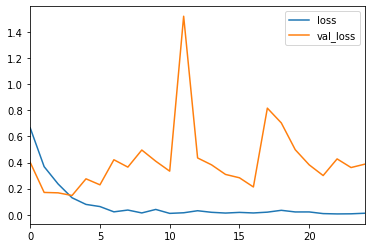

In [48]:
metrics[['loss','val_loss']].plot();

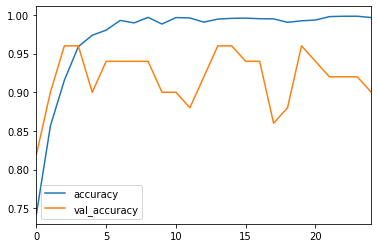

In [49]:
metrics[['accuracy','val_accuracy']].plot();

In [50]:
best_model = load_model('model/find_kermit.h5')

In [51]:
best_model.evaluate_generator(test_image_gen)

[0.14730523666366935, 0.96]

In [52]:
pred=best_model.predict_generator(test_image_gen)

In [53]:
np.round(pred.ravel(),2)

array([0.  , 0.98, 0.  , 0.09, 0.  , 0.  , 0.27, 0.64, 0.  , 0.  , 0.  ,
       0.17, 0.  , 0.09, 0.03, 0.18, 0.03, 0.  , 0.18, 0.  , 0.  , 0.02,
       0.3 , 0.  , 0.  , 1.  , 0.54, 0.99, 0.92, 1.  , 0.99, 1.  , 1.  ,
       0.89, 0.98, 0.62, 1.  , 0.81, 0.99, 0.99, 0.7 , 0.95, 1.  , 0.97,
       0.99, 1.  , 0.97, 0.72, 0.96, 0.99], dtype=float32)

In [54]:
# first 25 predictions, all truly not kermit
np.round(pred[:25],3) 
# the model had a little trouble at index 1 (0.981), 7 (0.644)

array([[0.   ],
       [0.981],
       [0.   ],
       [0.091],
       [0.   ],
       [0.002],
       [0.272],
       [0.644],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.169],
       [0.   ],
       [0.091],
       [0.031],
       [0.181],
       [0.031],
       [0.002],
       [0.184],
       [0.   ],
       [0.005],
       [0.016],
       [0.297],
       [0.002],
       [0.   ]], dtype=float32)

In [55]:
# first 25 predictions, all truly kermit
np.round(pred[25:],3) 
# the model didnt have much trouble with clasifying

array([[0.999],
       [0.537],
       [0.99 ],
       [0.92 ],
       [0.995],
       [0.994],
       [0.999],
       [0.999],
       [0.889],
       [0.978],
       [0.616],
       [0.999],
       [0.807],
       [0.989],
       [0.988],
       [0.705],
       [0.945],
       [1.   ],
       [0.965],
       [0.991],
       [0.996],
       [0.972],
       [0.724],
       [0.955],
       [0.986]], dtype=float32)

In [56]:
df_combined_preds = pd.DataFrame(test_image_gen.classes)
df_combined_preds = pd.concat([df_combined_preds,pd.Series(np.round(pred.ravel(),3))], axis=1)
#df_combined_preds


,0,0
0,0,0.000
1,0,0.981
2,0,0.000
3,0,0.091
4,0,0.000
5,0,0.002
6,0,0.272
7,0,0.644
8,0,0.000
9,0,0.000


In [57]:
###
### SET THRESHOLD at > 0.50
###
predictions_1 = (pred > 0.5)
preds_df_1 = pd.DataFrame(predictions_1)
df_combined_preds = pd.concat([df_combined_preds,preds_df_1], axis=1)
preds_df_1 = pd.concat([preds_df_1, pd.Series(test_image_gen.classes)], axis=1)
preds_df_1.columns=['prediction', 'truth']
preds_df_1.prediction = preds_df_1.prediction.astype(int)
print(classification_report(test_image_gen.classes, predictions_1))
# Truth = test_image_gen.classes
confusion_matrix_1 = confusion_matrix(test_image_gen.classes, predictions_1)
print(confusion_matrix_1)

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        25
           1       0.93      1.00      0.96        25

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50

[[23  2]
 [ 0 25]]


In [49]:
# my daigonals, at 50% look rally nice
# of the 25 non kermits, the model predicted 23 of them correctly.  true positive
# of the 25 kermits, it got them all right
# it predicted 2 false positives, so my accuracy on class 1 is .93
# it predicted 0 false negatatives, so my accuracy on class 0 is 1.00 

not defined yet, saul goodman


In [58]:
###
### SET THRESHOLD at > 0.95
###
predictions_2 = (pred > 0.95)
preds_df_2 = pd.DataFrame(predictions_2)
df_combined_preds = pd.concat([df_combined_preds,preds_df_2], axis=1)
preds_df_2 = pd.concat([preds_df_2, pd.Series(test_image_gen.classes)], axis=1)
preds_df_2.columns=['prediction', 'truth']
preds_df_2.prediction = preds_df_2.prediction.astype(int)

# Truth = test_image_gen.classes

print('classification report\n')
print(classification_report(test_image_gen.classes, predictions_2))
confusion_matrix_2 = confusion_matrix(test_image_gen.classes, predictions_2)
print('\nconfusion matrix')
print(confusion_matrix_2)

classification report

              precision    recall  f1-score   support

           0       0.75      0.96      0.84        25
           1       0.94      0.68      0.79        25

    accuracy                           0.82        50
   macro avg       0.85      0.82      0.82        50
weighted avg       0.85      0.82      0.82        50


confusion matrix
[[24  1]
 [ 8 17]]


In [ ]:
# by tweaking my threshold, telling the model we wanto to extra sure about the precision of class 1
# I increased the precision of class 1 to .94 (or i can say i reduced the false positives by 50%)
# but i lost on recall, i tightened my grip on the kermits and 8 slipped through


In [59]:
###
### SET THRESHOLD at > 0.05
###
predictions_3 = (pred > 0.05)
preds_df_3 = pd.DataFrame(predictions_3)
df_combined_preds = pd.concat([df_combined_preds,preds_df_3], axis=1)
preds_df_3 = pd.concat([preds_df_3, pd.Series(test_image_gen.classes)], axis=1)
preds_df_3.columns=['prediction', 'truth']
preds_df_3.prediction = preds_df_3.prediction.astype(int)
print(classification_report(test_image_gen.classes, predictions_3))
# Truth = test_image_gen.classes
confusion_matrix_3 = confusion_matrix(test_image_gen.classes, predictions_3)
print(confusion_matrix_3)

              precision    recall  f1-score   support

           0       1.00      0.64      0.78        25
           1       0.74      1.00      0.85        25

    accuracy                           0.82        50
   macro avg       0.87      0.82      0.81        50
weighted avg       0.87      0.82      0.81        50

[[16  9]
 [ 0 25]]


In [ ]:
# loosened my grip, cast a very wide net, if it looks like a kermit just a bit, call it kermit
# so my recall for kermit jumped to 100, we go them all!
# but at the expense of precision, we got 9 of non kermits thrown in with the kermits

In [60]:
print('what went wrong')
df_combined_preds.columns=['truth','predicted', 'fifty', 'ninety_five', 'five']
print('\ntrouble with 0.50')
print(df_combined_preds[ (df_combined_preds.truth != df_combined_preds.fifty)])
print('\ntrouble with 0.95')
print(df_combined_preds[ (df_combined_preds.truth != df_combined_preds.ninety_five)  ])
print('\ntrouble with 0.05')
print(df_combined_preds[ (df_combined_preds.truth != df_combined_preds.five)  ])

what went wrong

trouble with 0.50
   truth  predicted  fifty  ninety_five  five
1      0      0.981   True         True  True
7      0      0.644   True        False  True

trouble with 0.95
    truth  predicted  fifty  ninety_five  five
1       0      0.981   True         True  True
26      1      0.537   True        False  True
28      1      0.920   True        False  True
33      1      0.889   True        False  True
35      1      0.616   True        False  True
37      1      0.807   True        False  True
40      1      0.705   True        False  True
41      1      0.945   True        False  True
47      1      0.724   True        False  True

trouble with 0.05
    truth  predicted  fifty  ninety_five  five
1       0      0.981   True         True  True
3       0      0.091  False        False  True
6       0      0.272  False        False  True
7       0      0.644   True        False  True
11      0      0.169  False        False  True
13      0      0.091  False        Fa

In [61]:
print("confusion matrix .50")
print(confusion_matrix_1)
print("confusion matrix .95")
print(confusion_matrix_2)
print("confusion matrix .05")
print(confusion_matrix_3)

confusion matrix .50
[[23  2]
 [ 0 25]]
confusion matrix .95
[[24  1]
 [ 8 17]]
confusion matrix .05
[[16  9]
 [ 0 25]]


In [63]:
# for my purposes, I want my model to have high precision.
# When the model tells me it found a team kermit picture, i want it to 
# be of team kermit as much sa possible.
# so thats a high precision to weed out the duds, weed out the FP
# from# but with the data i trained/tested the model with, 50% and 95% were not too far off on precision



correctly classified as kermit
25 1 1


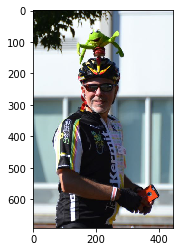

26 1 1


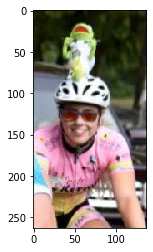

27 1 1


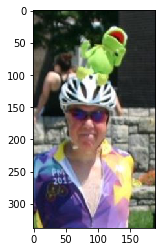

28 1 1


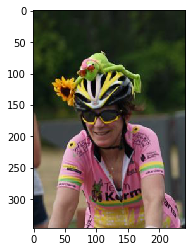

29 1 1


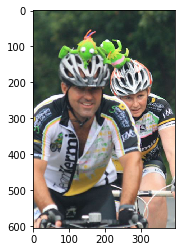

30 1 1


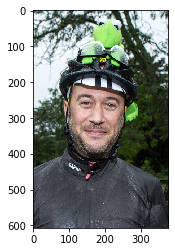

31 1 1


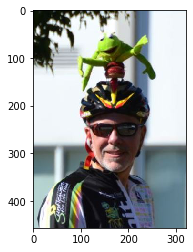

32 1 1


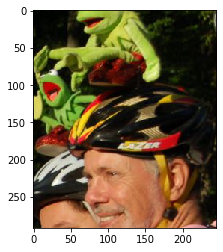

33 1 1


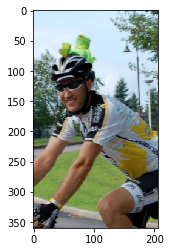

34 1 1


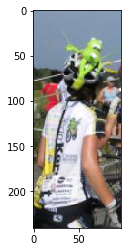

35 1 1


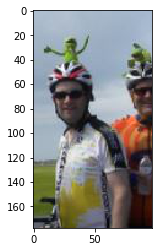

36 1 1


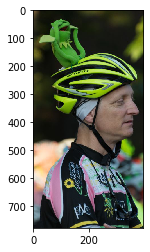

37 1 1


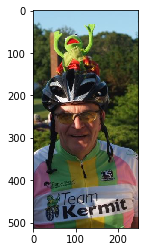

38 1 1


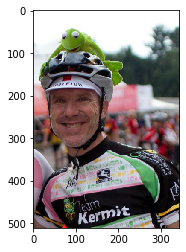

39 1 1


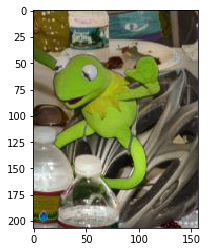

40 1 1


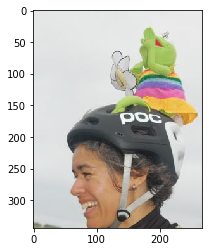

41 1 1


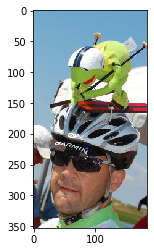

42 1 1


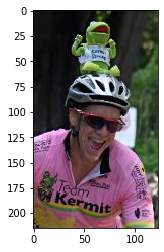

43 1 1


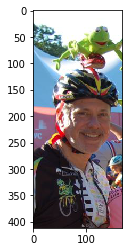

44 1 1


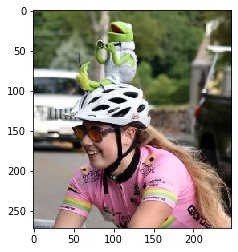

45 1 1


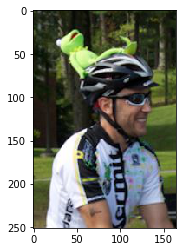

46 1 1


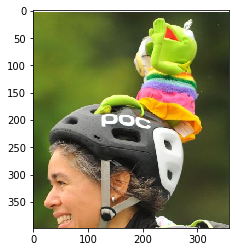

47 1 1


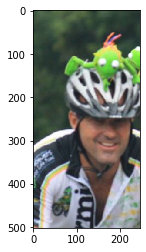

48 1 1


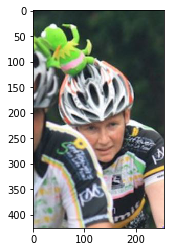

49 1 1


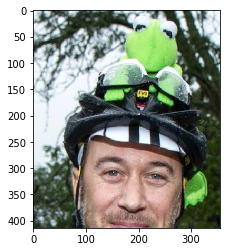

In [66]:
# have a look at the true positives
true_positive = preds_df_1[(preds_df_1['prediction'] == preds_df_1['truth']) & (preds_df_1['prediction']==1) ]

print('correctly classified as kermit')
for index, row in true_positive.iterrows():
    print(index, row['prediction'], row['truth'])
    one_unidentified_file = data_dir_test + class_1 + '/' + os.listdir(data_dir_test + class_1 + '/')[index-25]
    plt.imshow(imread(one_unidentified_file))
    plt.show()

incorrectly classified as phat
1 1 0


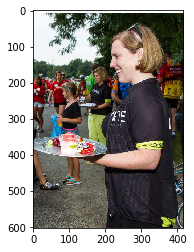

7 1 0


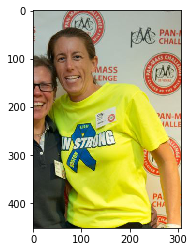

In [67]:
# have a look at the mis classified images - false positives
false_positive = preds_df_1[(preds_df_1['prediction'] != preds_df_1['truth']) & (preds_df_1['prediction']==1) ]

print('incorrectly classified as phat')
for index, row in false_positive.iterrows():
    print(index, row['prediction'], row['truth'])
    one_unidentified_file = data_dir_test + class_0 + '/' + os.listdir(data_dir_test + class_0 + '/')[index]
    plt.imshow(imread(one_unidentified_file))
    plt.show()

In [ ]:
# conclusion
# this model could be useful in pouring through thousands of images, looking for team kermit tuesday

# if you found this repo helpful or want to join the fight against cancer please consider donating to the PMC
https://donate.pmc.org/BM0248/